<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/associationmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Top frequent itemsets (support >= 0.12):
 support        itemsets
    0.52         (bread)
    0.44          (milk)
    0.32          (eggs)
    0.28        (butter)
    0.24   (milk, bread)
    0.24 (butter, bread)
    0.20       (diapers)
    0.20   (eggs, bread)
    0.20    (eggs, milk)
    0.16          (beer)

Top association rules (sorted by lift):
  antecedents consequents  support  confidence     lift
       (beer)   (diapers)     0.12    0.750000 3.750000
    (diapers)      (beer)     0.12    0.600000 3.750000
        (jam)    (butter)     0.12    1.000000 3.571429
     (butter)     (bread)     0.24    0.857143 1.648352
       (eggs)      (milk)     0.20    0.625000 1.420455
    (diapers)      (milk)     0.12    0.600000 1.363636
(eggs, bread)      (milk)     0.12    0.600000 1.363636
       (eggs)     (bread)     0.20    0.625000 1.201923
 (eggs, milk)     (bread)     0.12    0.600000 1.153846

Saved rules to: exp8_rules.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


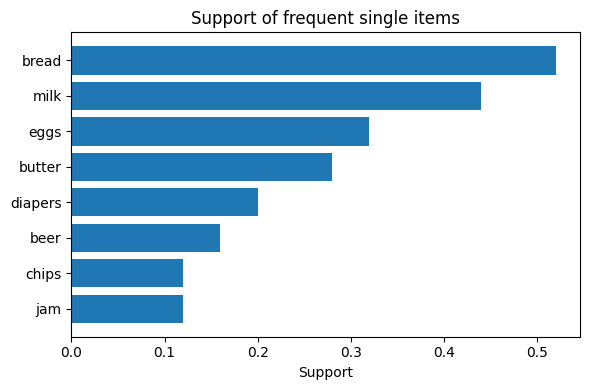

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

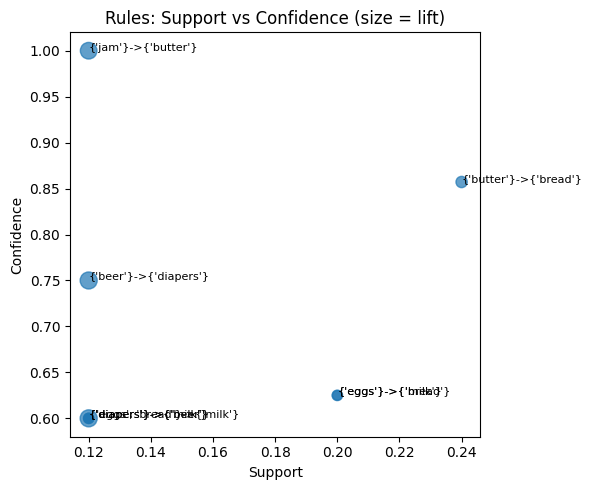

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
# exp8_apriori.py
# Minimal Association Rule Mining (Apriori) + necessary plots
# Installs mlxtend if not present, then runs Apriori on a dataset or sample transactions.

import sys
import subprocess

# install mlxtend if missing
try:
    import mlxtend
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import pandas as pd
import matplotlib.pyplot as plt
import os

# 1) Load transactions: try groceries.csv (one transaction per row, comma-separated items)
if os.path.exists("groceries.csv"):
    tx = []
    with open("groceries.csv") as f:
        for line in f:
            items = [it.strip() for it in line.strip().split(",") if it.strip()]
            if items:
                tx.append(items)
else:
    # fallback sample transactions (reasonably diverse)
    tx = [
        ["milk","bread","eggs"],
        ["bread","butter"],
        ["milk","diapers","beer","eggs"],
        ["bread","butter","jam"],
        ["milk","bread","butter","eggs"],
        ["diapers","beer"],
        ["milk","bread","diapers","eggs"],
        ["beer","chips"],
        ["bread","eggs"],
        ["milk","bread"],
        ["butter","jam"],
        ["milk","diapers","bread","beer"],
        ["bread","butter","chips"],
        ["eggs","bacon"],
        ["milk","eggs","bacon"],
        ["bread","butter","jam","eggs"],
        ["milk","bread","butter"],
        ["chips","soda"],
        ["bread","soda"],
        ["diapers","wipes","baby_formula"],
        # add a few more to increase variety
        ["milk","cereal"],
        ["cereal","milk","banana"],
        ["banana","bread"],
        ["milk","cookies"],
        ["cookies","tea"]
    ]

# 2) One-hot encode transactions
te = TransactionEncoder()
te_ary = te.fit(tx).transform(tx)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 3) Frequent itemsets (adjust min_support as needed)
freq_items = apriori(df, min_support=0.12, use_colnames=True)  # 12% support
freq_items = freq_items.sort_values("support", ascending=False)
print("\nTop frequent itemsets (support >= 0.12):")
print(freq_items.head(10).to_string(index=False))

# 4) Generate association rules (min_threshold for confidence)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(["lift","confidence"], ascending=[False, False])
print("\nTop association rules (sorted by lift):")
print(rules[["antecedents","consequents","support","confidence","lift"]].head(10).to_string(index=False))

# Save rules (for submission)
rules.to_csv("exp8_rules.csv", index=False)
print("\nSaved rules to: exp8_rules.csv")

# 5) Plot A — Bar chart of top single-item supports (necessary to choose threshold)
single_supports = freq_items[freq_items["itemsets"].map(lambda s: len(s)==1)].copy()
single_supports["item"] = single_supports["itemsets"].map(lambda s: next(iter(s)))
single_supports = single_supports.sort_values("support", ascending=True)

plt.figure(figsize=(6,4))
plt.barh(single_supports["item"], single_supports["support"])
plt.xlabel("Support")
plt.title("Support of frequent single items")
plt.tight_layout()
plt.show()

# 6) Plot B — Scatter: support vs confidence for rules (point size = lift)
if not rules.empty:
    plt.figure(figsize=(6,5))
    plt.scatter(rules["support"], rules["confidence"], s=(rules["lift"]*40), alpha=0.7)
    for i, row in rules.head(8).iterrows():
        plt.annotate(f"{set(row['antecedents'])}->{set(row['consequents'])}",
                     (row["support"], row["confidence"]), fontsize=8)
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.title("Rules: Support vs Confidence (size = lift)")
    plt.tight_layout()
    plt.show()
else:
    print("No rules generated with current thresholds. Lower min_support or min_threshold if needed.")
